
# Project: Investigate the No-Show Appointement Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in Brazil persons make a docotor appointement but dont show-up. This dataset and its 14 variables (characteristics) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

##### The variables of this data set are :

PatientId : Identification of a patient

AppointmentID : Identification of each appointment

Gender : Male or Female

ScheduledDay : The day someone called or registered the appointment.

AppointmentDay : The day of the actuall appointment.

Age : patient's Age

Neighbourhood : Where the appointment takes place.

Scholarship : 1 = recipient ,                              0 = not recipient.

Hipertension : 1 = Suffering from high blood pressure ,    0 = not suffering.

Diabetes :1 = Suffering from diabetes ,                    0 = not suffering.

Alcoholism : 1 = Suffering from alcoholism ,               0 = not suffering.

Handcap : Number of disabilities that the patient suffers from.

SMS_received : 1 = received SMS ,                          0 = not received SMS.

No-show : Yes or No it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.






In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# print the first three rows of our data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# data shape 'number of rows and columns'.
df.shape

(110527, 14)

###### 110527 rows and 14 columns

In [5]:
# explore the information of our data according to data type and nun values in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

###### 'PatientId' should be converted to int instead of float.
###### 'ScheduledDay' and 'AppointmentDay' must be showed as datetime.

In [7]:
# ensure if there are any duplicates in data
df.duplicated().sum()

0

In [8]:
# Obtaining statistical information for data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###### patients whose Age less than 0 should be droped from the dataset.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# rename the last column 'No-show'
df.rename(columns={'No-show' : 'No_show'}, inplace= True)

In [10]:
# modifying data type of columns 'PatientId','ScheduledDay', and 'AppointmentDay'
df['PatientId'] = df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
# drop patients whose age < 0
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.drop(index = 99832, inplace = True)

In [13]:
# explore and check data after our mofifications
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_show                   object
dtype: object

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


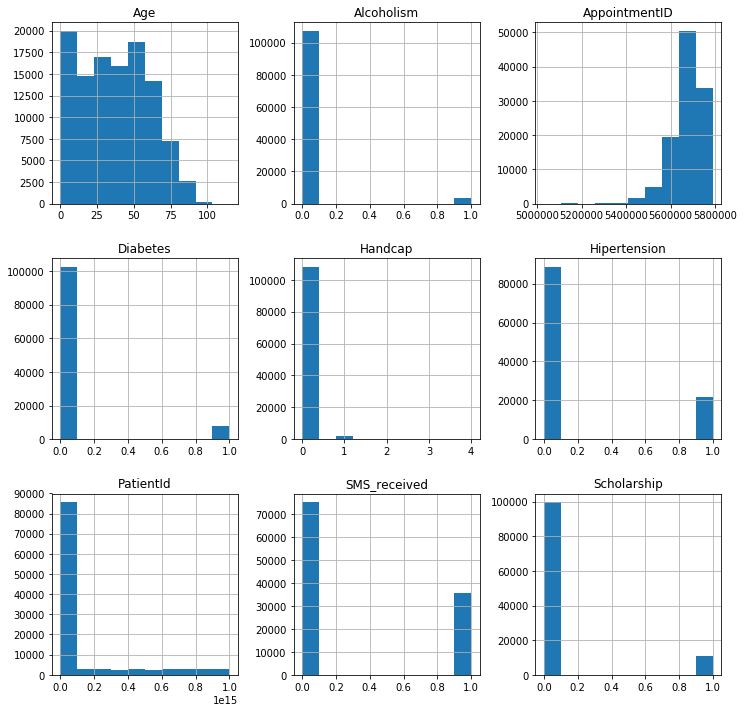

In [16]:
# Visualize the data
df.hist(figsize = (12,12));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Is there any relation between revieving SMS and no show

In [17]:
# count the number of patients who showed-up by masking
showed = df[df['No_show'] == 'No']
showed['No_show'].count()

88207

In [18]:
# count the number of patients who didn't show-up by masking
not_showed = df[df['No_show'] == 'Yes']
not_showed['No_show'].count()

22319

In [19]:
# count the number of patients who received SMS by masking
received = df[df['SMS_received'] == 1]
received_count = received['SMS_received'].count()
received_count

35482

In [20]:
# count the number of patients who didn't received SMS by masking
not_received = df[df['SMS_received'] == 0]
not_received_count = not_received['SMS_received'].count()
not_received_count

75044

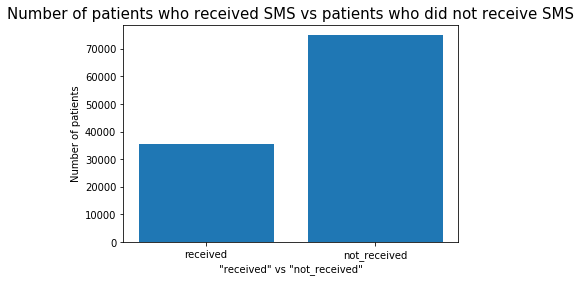

In [21]:
# Bar plot of 'Number of patients who received SMS vs patients who did not receive SMS'
locations = [1,2]
heights = [received_count, not_received_count]
labels = ['received', 'not_received']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of patients who received SMS vs patients who did not receive SMS' , fontsize = 15)
plt.xlabel('"received" vs "not_received"')
plt.ylabel('Number of patients');

##### patients who didn't received SMS larger than who received.

In [22]:
df.groupby(['SMS_received'])['No_show'].value_counts()

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

In [23]:
# Calculate the ratio between patients who received SMS regarding the showed-up or not to the appointment
received_showed = received.groupby(['No_show'])['SMS_received'].count()
received_showed

No_show
No     25698
Yes     9784
Name: SMS_received, dtype: int64

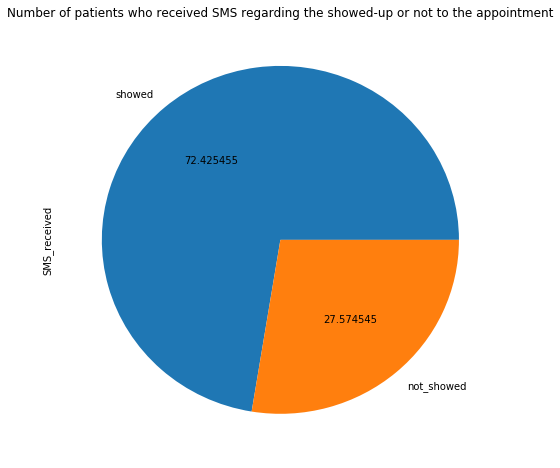

In [24]:
received_showed.plot(kind = 'pie', autopct = '%f' , labels = ['showed','not_showed'], title = 'Number of patients who received SMS regarding the showed-up or not to the appointment', figsize = (8,8));

###### about 72.4 % of patients who received SMS showed-up to the appointment and 27.6 % didn't show-up to appointment.

In [25]:
# Calculate the ratio between patients who didn't receive SMS regarding the showed-up or not to the appointment
not_received_showed = not_received.groupby(['No_show'])['SMS_received'].count()
not_received_showed

No_show
No     62509
Yes    12535
Name: SMS_received, dtype: int64

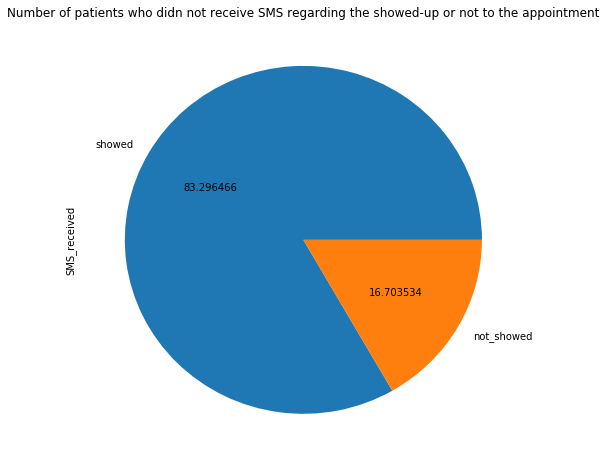

In [26]:
not_received_showed.plot(kind = 'pie', autopct = '%f', labels = ['showed','not_showed'], title ='Number of patients who didn not receive SMS regarding the showed-up or not to the appointment', figsize =(8,8));

###### about 83.3 % of patients who didn't receive SMS showed-up to the appointment and 16.7 % didn't show-up to appointment.

### Research Question 2   Is there any relation gender of patients  and no show

In [27]:
df.groupby(['Gender'])['No_show'].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

In [28]:
# count the number of males by masking
males = df[df['Gender'] == 'M']
males_count = males['Gender'].count()
males_count

38687

In [29]:
# count the number of females by masking
females = df[df['Gender'] == 'F']
females_count = females['Gender'].count()
females_count

71839

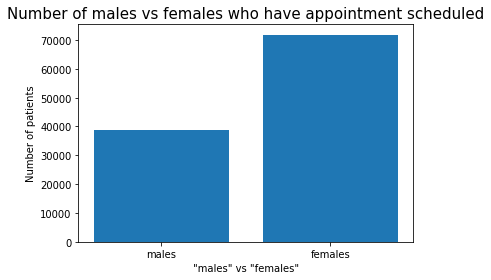

In [30]:
# Bar plot of 'Number of males vs females who have appointment scheduled'
locations = [1,2]
heights = [males_count, females_count]
labels = ['males', 'females']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of males vs females who have appointment scheduled' , fontsize = 15)
plt.xlabel('"males" vs "females"')
plt.ylabel('Number of patients');

##### Number of Females who booked a medical appointment higher than the number of Males and this may reflects that women have a tendency to care about their health more than men.

In [31]:
# count the number of males have appointment scheduled
males_count = males.groupby(['No_show'])['Gender'].count()
males_count

No_show
No     30962
Yes     7725
Name: Gender, dtype: int64

In [32]:
# count the number of females have appointment scheduled
females_counts = females.groupby(['No_show'])['Gender'].count()
females_counts

No_show
No     57245
Yes    14594
Name: Gender, dtype: int64

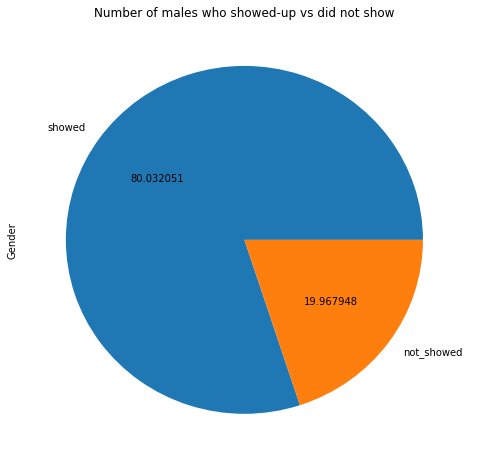

In [33]:
# Calculate the ratio Number of males who showed-up vs didn't show
males_count.plot(kind = 'pie', autopct = '%f', title = 'Number of males who showed-up vs did not show',labels = ['showed','not_showed'], figsize =(8,8));

###### about 80 % of males showed-up to the appointment and 20 % didn't show-up to appointment

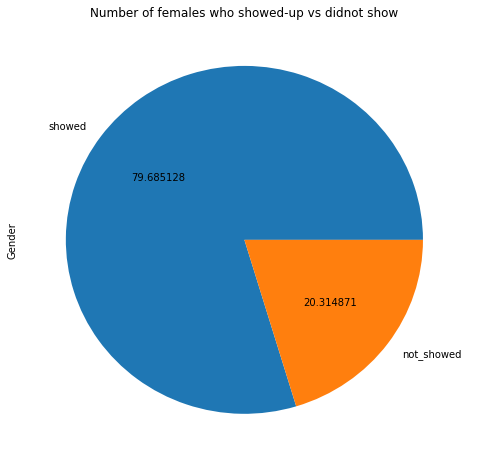

In [34]:
# Calculate the ratio Number of females who showed-up vs didn't show
females_counts.plot(kind = 'pie', autopct = '%f', title = 'Number of females who showed-up vs didnot show',labels = ['showed','not_showed'], figsize =(8,8));

###### about 79.7 % of females showed-up to the appointment and 19.3 % didn't show-up to appointment

###### The ratio between the number of males and females who attended the examination appointment is approximately close, There is no clear relationship whether the patient’s gender has a high or low relationship with the reason for attending the examination appointment scheduled for them

<a id='conclusions'></a>
## Conclusions


##### Results
our data suggest that :
1. there is no big difference between the distribution of Age between patients who showed up for the oppointment verses the patients show who didn't show up .

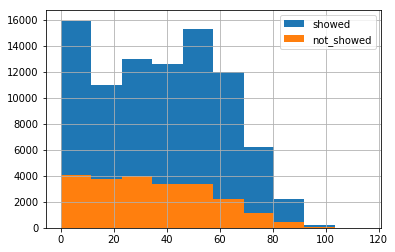

In [52]:
show = df['No_show'] == 'No'
not_show = df['No_show'] == 'Yes'
df.Age[showed].hist(label='showed')
df.Age[not_showed].hist(label='not_showed')
plt.legend();

2. there is a higher percentage of people that received an SMS and didn't show up compared to people who received an SMS and showed up.
3. The ratio between the number of males and females who attended the examination appointment is approximately close, There is no clear relationship whether the patient’s gender has a high or low relationship with the reason for attending the examination appointment scheduled for them
4. also there is no strong relationship between being enrolled in a scholarship program and showing up to an appointment

##### Limitations:
there are couple of limitations with our data :
1. most of our variables are categorical, which doesn't allow for a high level of statistical methods that can be used to provide correlations, etc
2. the statistics used here are descriptive, meaning that we didn't create any hypothesis or controlled experiments of interference with our data.
3. we don't have a lot of details for certain factor to draw a conclusion. for SMS_received example, the data shows that no-showers are more likely to receive as SMS, This may seem illogical, but we don't have information of conditions of when the SMS is  sent 
4. can't show a strong correlation between factors since most of our data is categorical.